<a href="https://colab.research.google.com/github/RohanGupta-7/Assignment_DAI101_Rohan_23114088/blob/main/DAI_101_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#  Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# -------------------------------
# 1. Load and Inspect the Data
# -------------------------------
# Load dataset
file_path = "data_core.csv"
df = pd.read_csv(file_path)

# Remove rows with any null values
df_clean = df.dropna()

In [65]:
# Display the first few rows
print("First 5 rows of the cleaned dataset:")
(df_clean.head())

First 5 rows of the cleaned dataset:


Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea

In [66]:
# Handling Missing Values

# Fill numerical columns with mean
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled successfully!")


Missing values handled successfully!


<ipython-input-66-ebffdf5e4742>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-66-ebffdf5e4742>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [67]:
# Display dataset info
print("\nCleaned Dataset Information:")
(df_clean.info())


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [68]:
# Display summary statistics
print("\nSummary Statistics:")
(df_clean.describe())


Summary Statistics:


Temparature     Humidity     Moisture     Nitrogen    Potassium  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     30.338895    59.210731    43.580862    18.429125     3.916375   
std       4.478262     8.177366    12.596156    11.852406     5.494807   
min      20.000000    40.020000    20.000000     0.000000     0.000000   
25%      27.050000    53.277500    33.967500     9.000000     0.000000   
50%      30.240000    59.110000    42.250000    14.000000     1.000000   
75%      33.460000    65.082500    52.950000    26.000000     5.000000   
max      40.000000    80.000000    70.000000    46.000000    23.000000   

       Phosphorous  
count  8000.000000  
mean     18.512500  
std      13.244113  
min       0.000000  
25%       8.000000  
50%      18.000000  
75%      30.000000  
max      46.000000

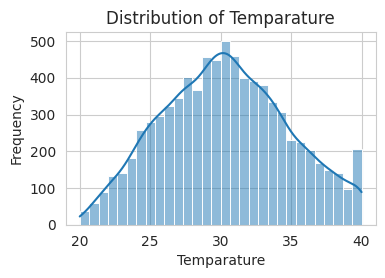

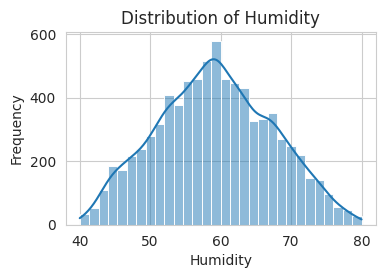

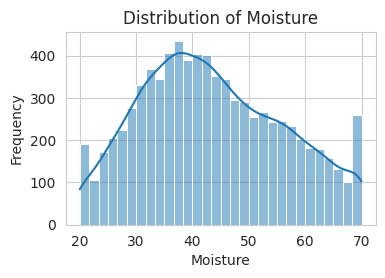

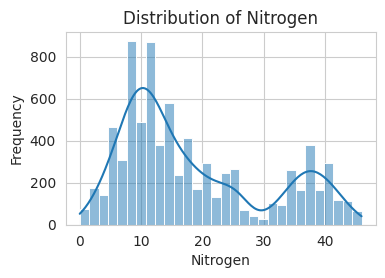

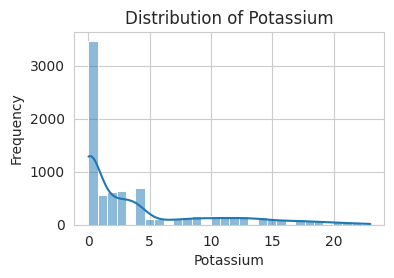

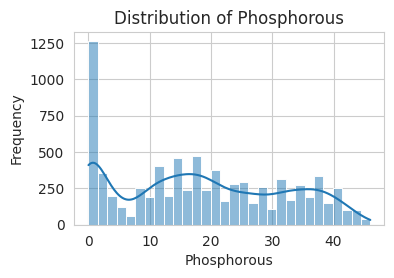

<ipython-input-69-5231327199ca>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_clean, order=order, palette="viridis")


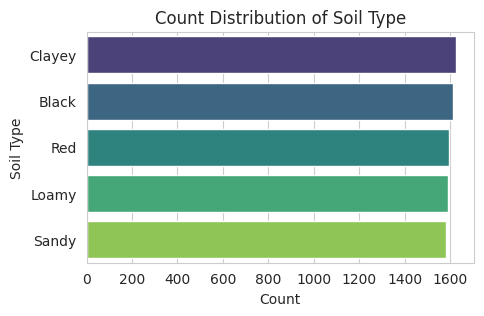

<ipython-input-69-5231327199ca>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_clean, order=order, palette="viridis")


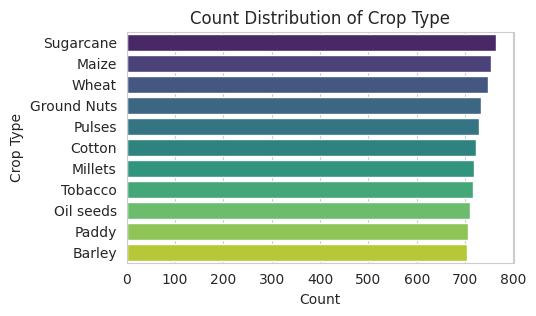

<ipython-input-69-5231327199ca>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_clean, order=order, palette="viridis")


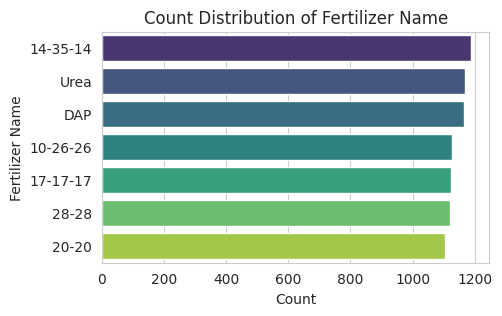

In [69]:
# Define numeric features
numeric_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# Plot histograms for numeric features
for feature in numeric_features:
    plt.figure(figsize=(4, 2.5))
    sns.histplot(df_clean[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Define categorical features
categorical_features = ['Soil Type', 'Crop Type', 'Fertilizer Name']

# Plot count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(5, 3))
    order = df_clean[feature].value_counts().index
    sns.countplot(y=feature, data=df_clean, order=order, palette="viridis")
    plt.title(f'Count Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

<ipython-input-70-ab2edc23dbf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_clean[feature], palette="coolwarm")


<Figure size 600x400 with 0 Axes>

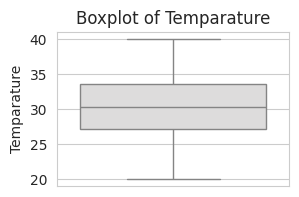

<ipython-input-70-ab2edc23dbf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_clean[feature], palette="coolwarm")


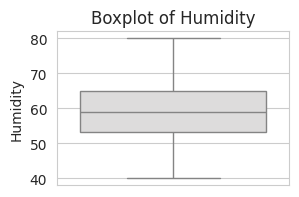

<ipython-input-70-ab2edc23dbf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_clean[feature], palette="coolwarm")


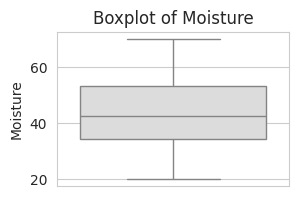

<ipython-input-70-ab2edc23dbf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_clean[feature], palette="coolwarm")


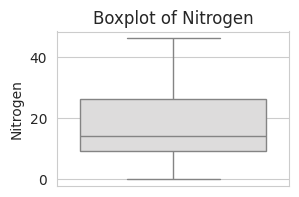

<ipython-input-70-ab2edc23dbf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_clean[feature], palette="coolwarm")


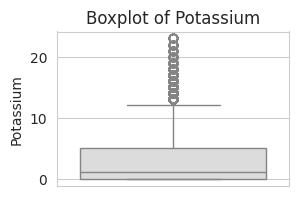

<ipython-input-70-ab2edc23dbf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_clean[feature], palette="coolwarm")


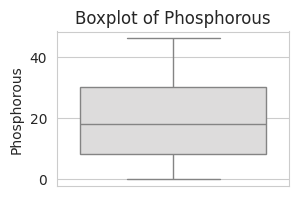

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(6, 4))

# Create individual boxplots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(3, 2))
    sns.boxplot(y=df_clean[feature], palette="coolwarm")
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

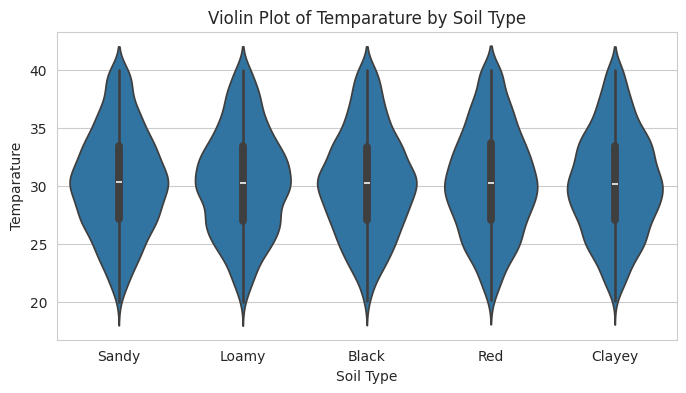

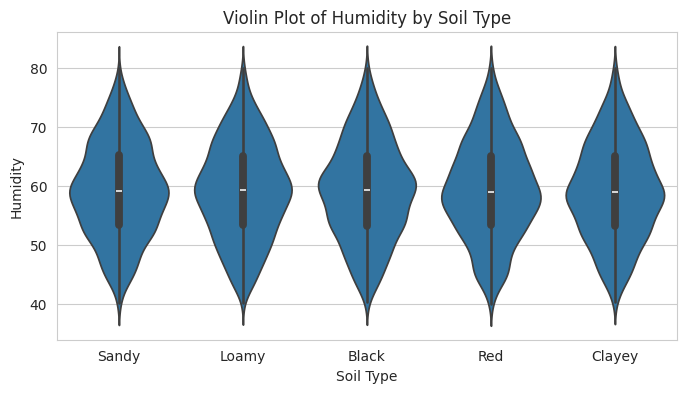

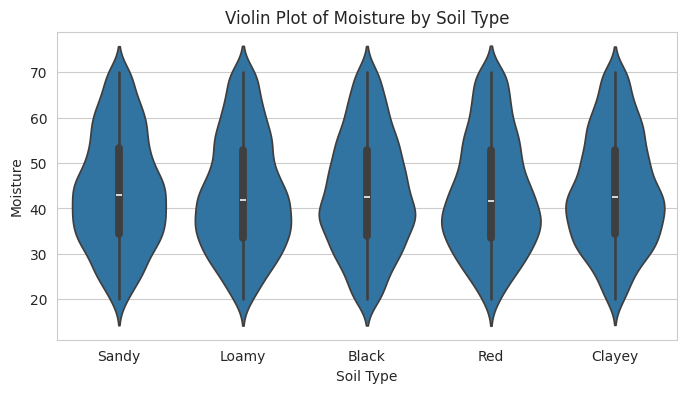

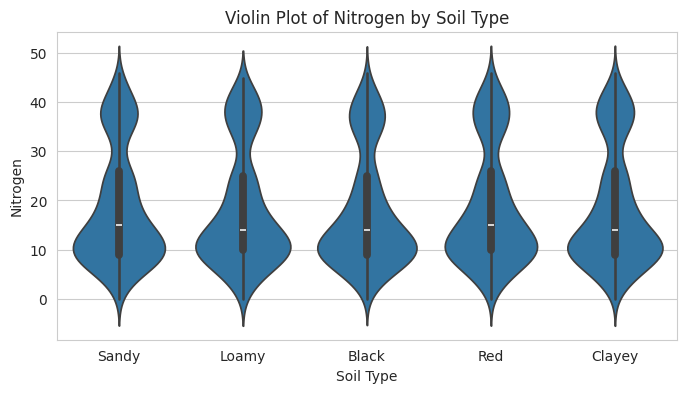

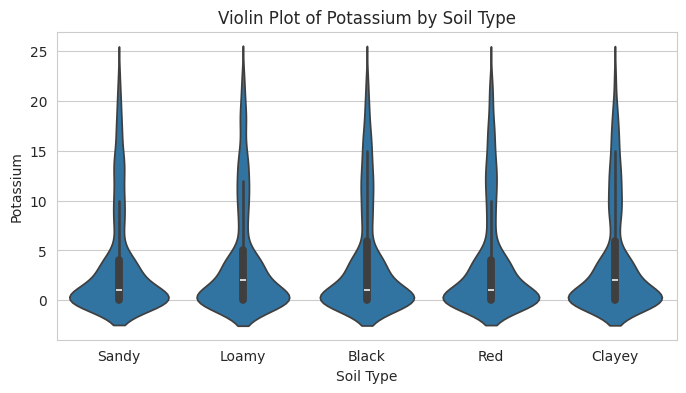

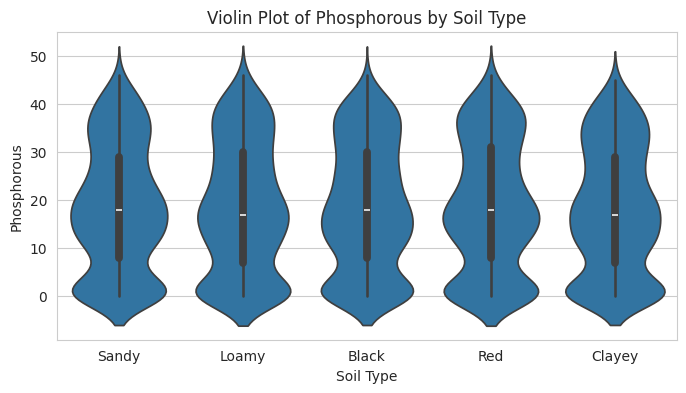

In [71]:
# Violin Plots
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df[cat_cols[0]], y=df[col])
    plt.title(f'Violin Plot of {col} by {cat_cols[0]}')
    plt.show()

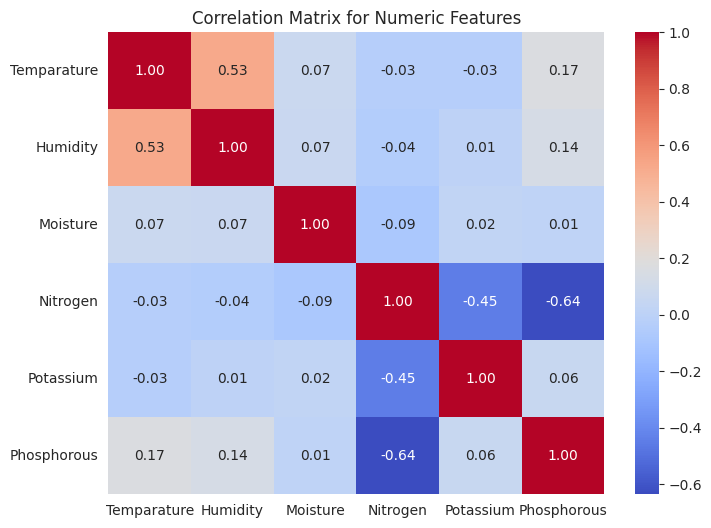

In [72]:
# a. Correlation Matrix for Numeric Features
plt.figure(figsize=(8, 6))
corr_matrix = df_clean[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

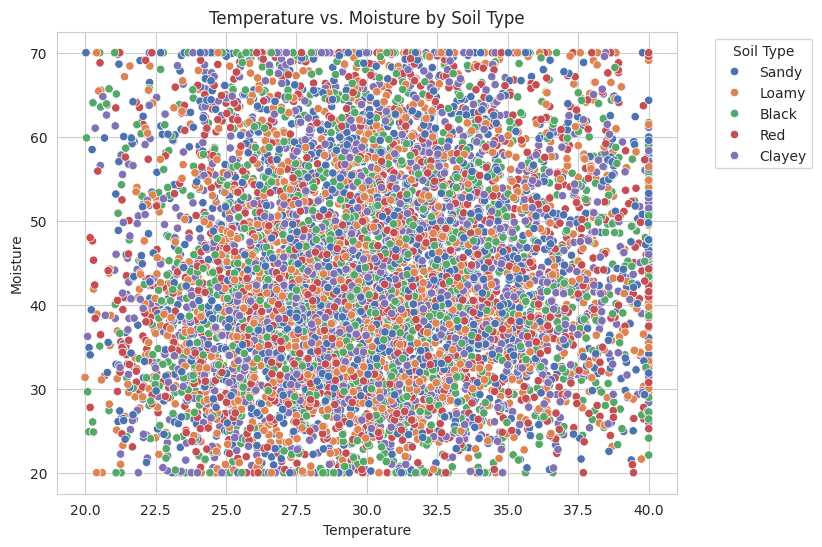

In [73]:
# b. Scatter Plots
# Scatter plot: Temperature vs. Moisture by Soil Type
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temparature', y='Moisture', data=df_clean, hue='Soil Type', palette="deep")
plt.title("Temperature vs. Moisture by Soil Type")
plt.xlabel("Temperature")
plt.ylabel("Moisture")
plt.legend(title="Soil Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

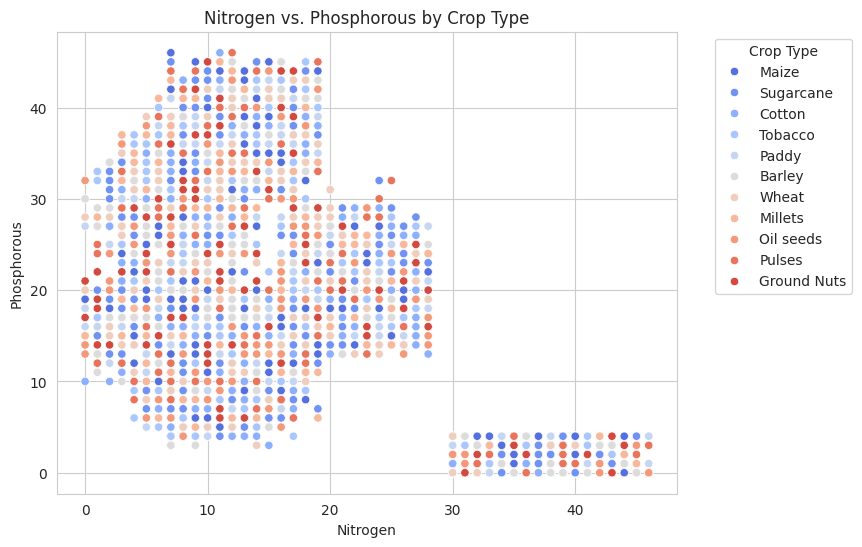

In [74]:
# Scatter plot: Nitrogen vs. Phosphorous by Crop Type
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Nitrogen', y='Phosphorous', data=df_clean, hue='Crop Type', palette="coolwarm")
plt.title("Nitrogen vs. Phosphorous by Crop Type")
plt.xlabel("Nitrogen")
plt.ylabel("Phosphorous")
plt.legend(title="Crop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-75-b37331e55b31>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_nitrogen_by_soil.values, y=avg_nitrogen_by_soil.index, palette="magma")


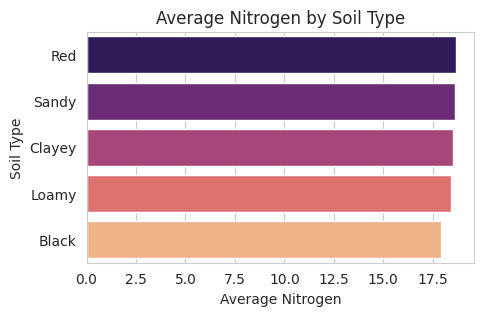

In [75]:
# d. Grouped Analysis - Average Nitrogen by Soil Type
avg_nitrogen_by_soil = df_clean.groupby('Soil Type')['Nitrogen'].mean().sort_values(ascending=False)
plt.figure(figsize=(5, 3))
sns.barplot(x=avg_nitrogen_by_soil.values, y=avg_nitrogen_by_soil.index, palette="magma")
plt.title("Average Nitrogen by Soil Type")
plt.xlabel("Average Nitrogen")
plt.ylabel("Soil Type")
plt.show()

<ipython-input-76-067f375dc045>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_phosphorous_by_crop.values, y=avg_phosphorous_by_crop.index, palette="inferno")


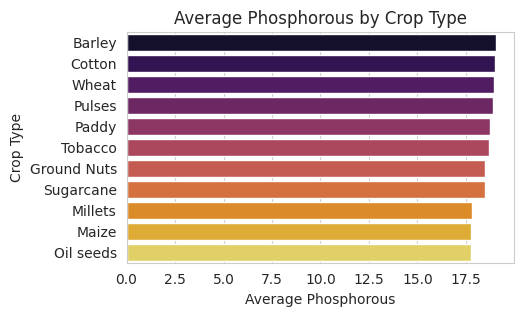

In [76]:
# e. Grouped Analysis - Average Phosphorous by Crop Type
avg_phosphorous_by_crop = df_clean.groupby('Crop Type')['Phosphorous'].mean().sort_values(ascending=False)
plt.figure(figsize=(5, 3))
sns.barplot(x=avg_phosphorous_by_crop.values, y=avg_phosphorous_by_crop.index, palette="inferno")
plt.title("Average Phosphorous by Crop Type")
plt.xlabel("Average Phosphorous")
plt.ylabel("Crop Type")
plt.show()

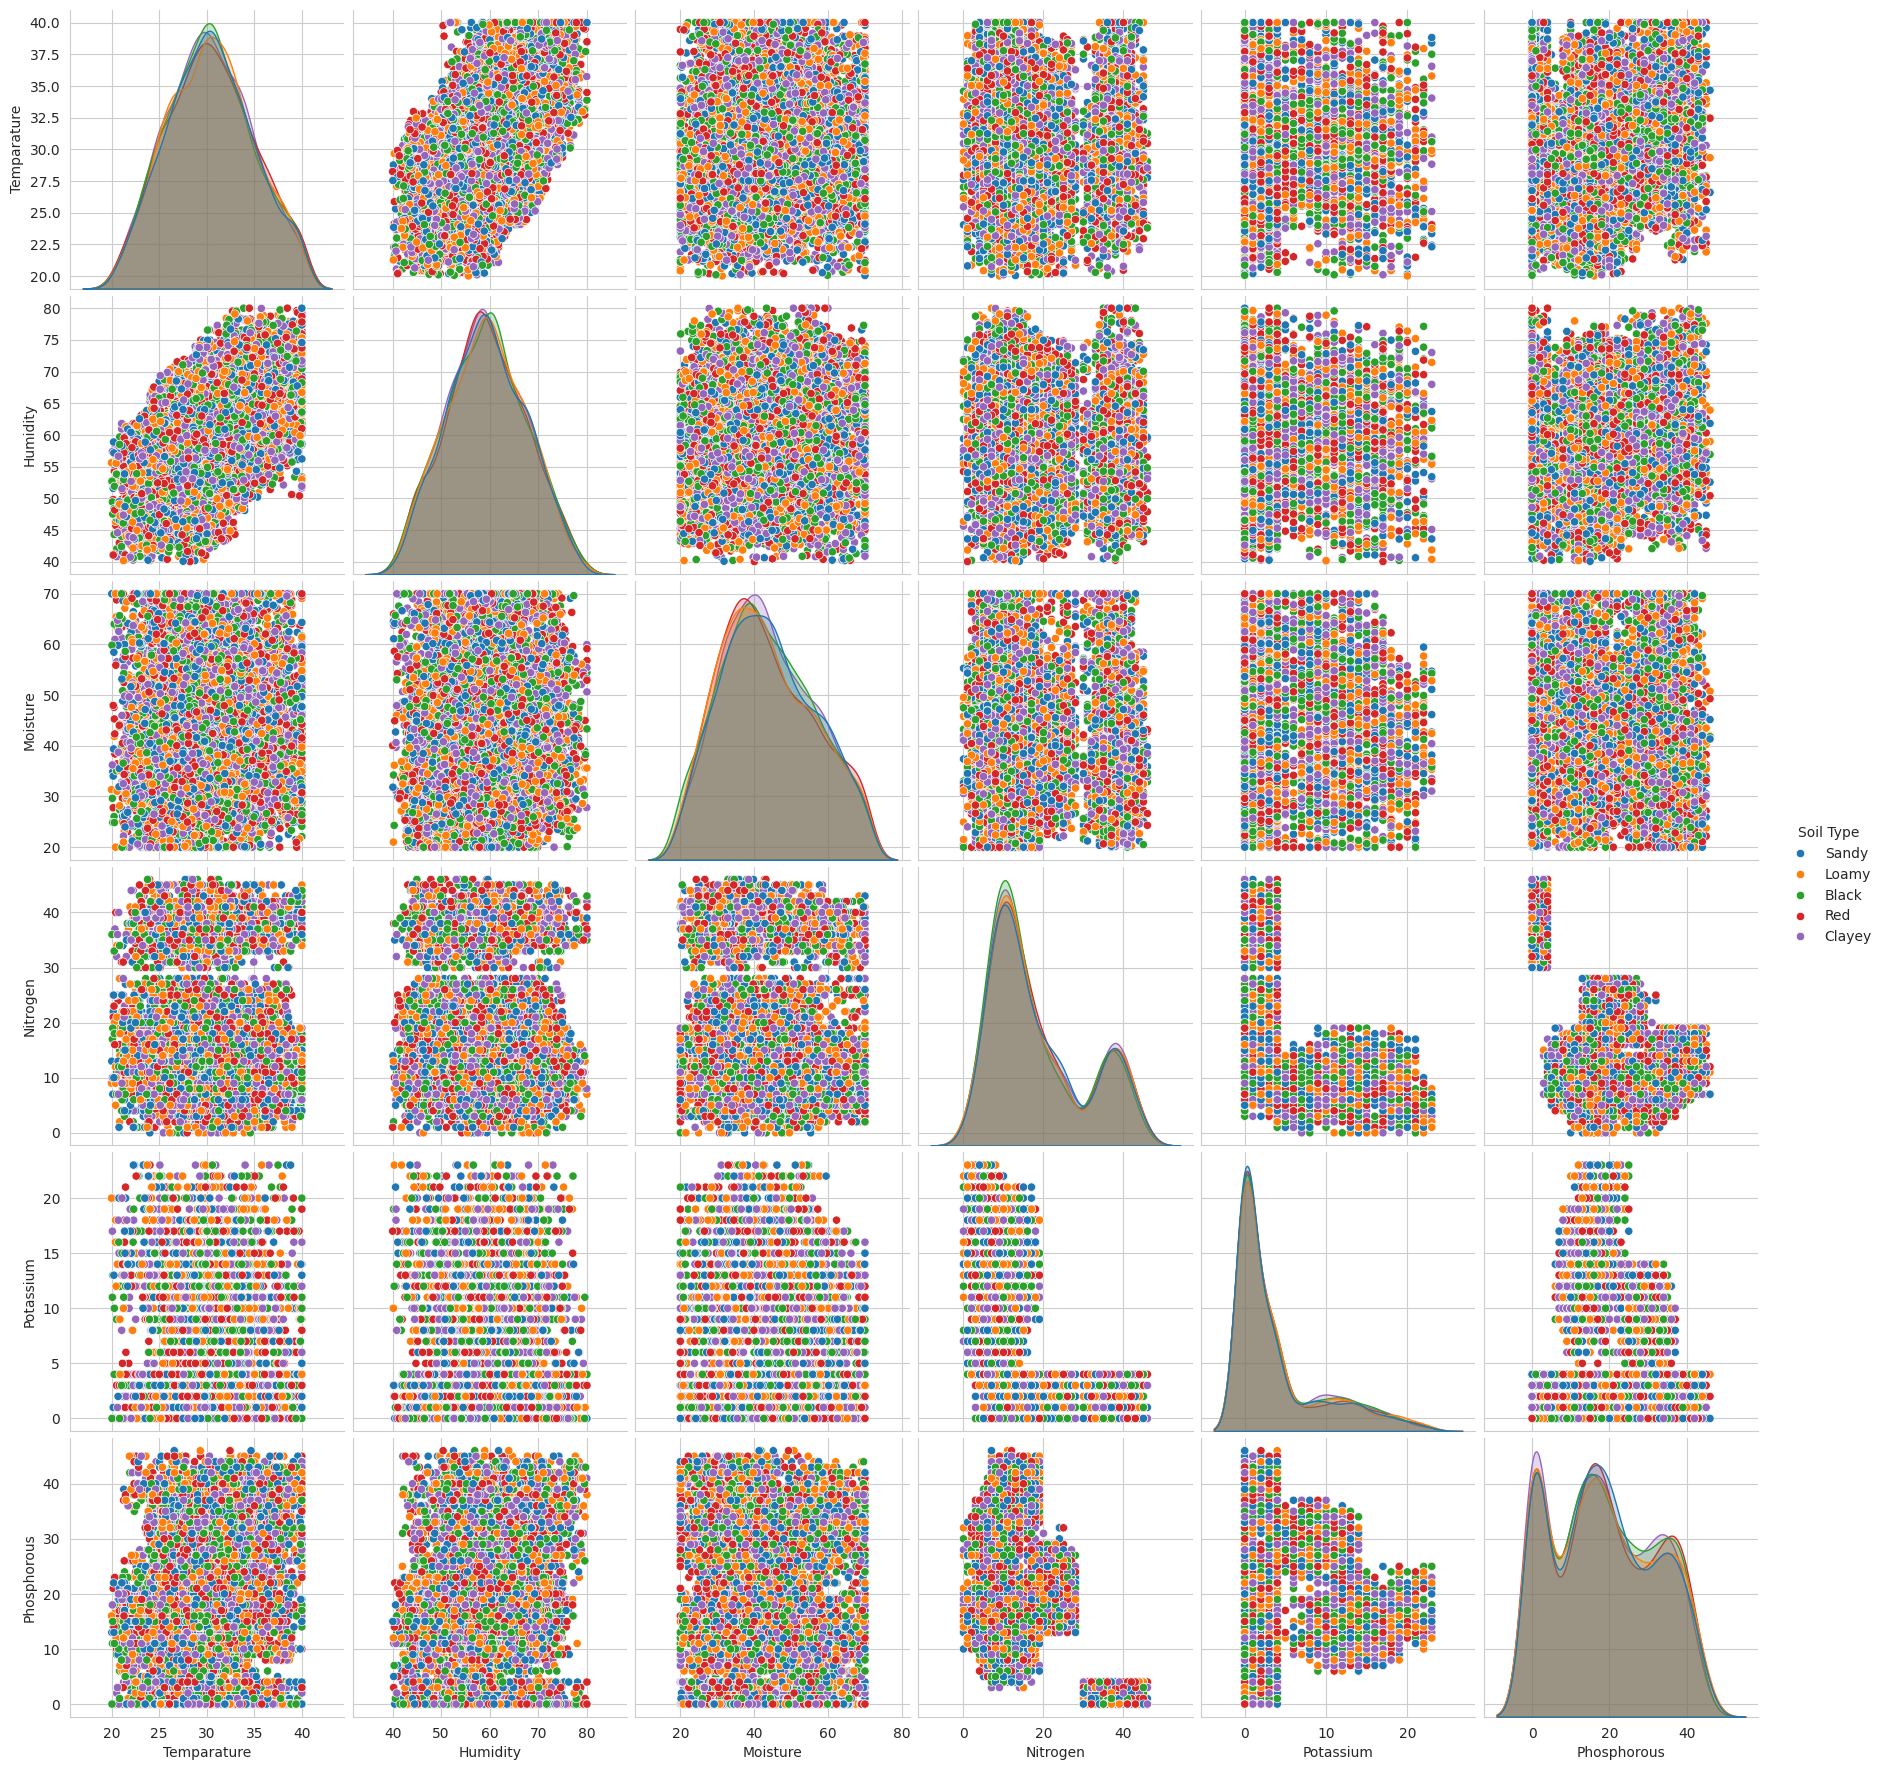

In [77]:
# Load the dataset
df = pd.read_csv('data_core.csv')  # Update with the correct dataset file

# Select only the specified columns
selected_columns = ["Temparature", "Humidity", "Moisture", "Soil Type", "Crop Type", "Nitrogen", "Potassium", "Phosphorous", "Fertilizer Name"]
df_selected = df[selected_columns]

# Identify categorical columns for hue
categorical_cols = ["Soil Type", "Fertilizer Name"]
hue_col = categorical_cols[0] if categorical_cols[0] in df.columns else None

# Generate the pair plot
sns.pairplot(df_selected, hue=hue_col, diag_kind='kde', height=3)
plt.show()

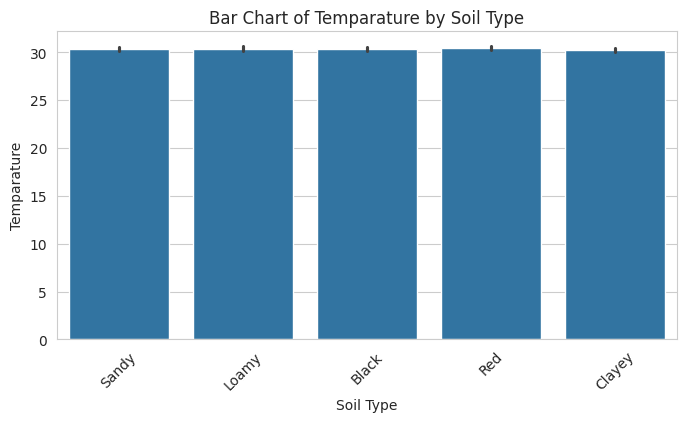

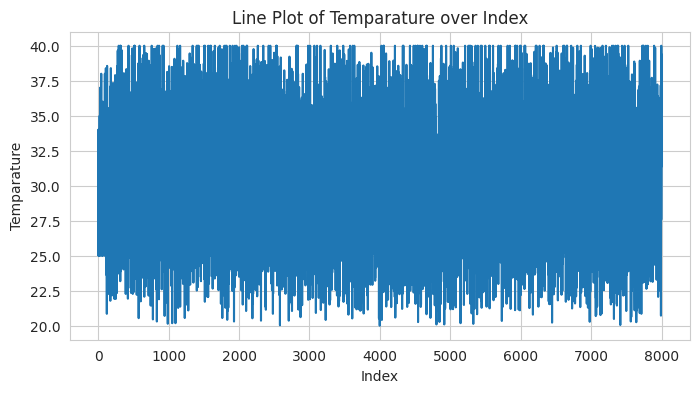

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Advanced Data Visualization

# Bar Chart Example
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x=cat_cols[0], y=num_cols[0])
plt.title(f'Bar Chart of {num_cols[0]} by {cat_cols[0]}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Line Plot Example
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x=df.index, y=num_cols[0])
plt.title(f'Line Plot of {num_cols[0]} over Index')
plt.xlabel("Index")
plt.ylabel(num_cols[0])
plt.show()
